# Folder navigation

In [35]:
import os
import re
from pathlib import Path

In [36]:
def build_file_list_from_path(path=Path('../res')):
    return_list = []
    
    # Build a list of every file directory in the given folder
    for root, dirs, files in os.walk(path.resolve()):
        print(root)
        # Filter out directories that contain unimportant or hidden files
        dirs[:] = [d for d in dirs if not d[0] == '.']
        dirs[:] = [d for d in dirs if not d[0] == '_']
        
        # use files and dirs
        for directory in dirs:
            print(f"\n\nFile Found: {root}/{directory}")
            directory = Path(f"{root}/{directory}")

            for file_var in os.listdir(directory):
                root_dir = Path(f"{root}")
                print(f"Adding to list files in: {Path(root/directory/file_var)}")

                return_list.append(f"{Path(root/directory/file_var)}")
    
    return return_list

In [37]:
list_of_files = build_file_list_from_path()

C:\Users\dparks1\PycharmProjects\civilpy\res


File Found: C:\Users\dparks1\PycharmProjects\civilpy\res/photos
Adding to list files in: C:\Users\dparks1\PycharmProjects\civilpy\res\photos\demo_photo_5.jpg
Adding to list files in: C:\Users\dparks1\PycharmProjects\civilpy\res\photos\demo_photo_6.jpg
C:\Users\dparks1\PycharmProjects\civilpy\res\photos


In [38]:
from pprint import pprint

for file in list_of_files:
    pprint(str(file))

'C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\photos\\demo_photo_5.jpg'
'C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\photos\\demo_photo_6.jpg'


### Filter list of files for certain file types

In [39]:
photos = [ fi for fi in list_of_files if re.search("(svg|heif|bmp|tiff|webp|jpeg|png|jpg)$", str(fi), re.IGNORECASE)]

In [40]:
photos

['C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\photos\\demo_photo_5.jpg',
 'C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\photos\\demo_photo_6.jpg']

### Map Out Photos

In [41]:
from PIL import Image
from PIL.Image import Exif
from PIL.ExifTags import TAGS, GPSTAGS

def get_exif(file_name) -> Exif:
    image: Image.Image = Image.open(file_name)
    return image.getexif()


def get_geo(exif):
    for key, value in TAGS.items():
        if value == "GPSInfo":
            break
    gps_info = exif.get_ifd(key)
    return {
        GPSTAGS.get(key, key): value
        for key, value in gps_info.items()
    }

In [42]:
photo_dict = {}

for photo in photos:
    exif = get_exif(photo)
    geo = get_geo(exif)
    photo_dict[photo] = geo

In [43]:
photo_dict

{'C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\photos\\demo_photo_5.jpg': {'GPSLatitudeRef': 'N',
  'GPSLatitude': (49.0, 51.0, 12.94),
  'GPSLongitudeRef': 'E',
  'GPSLongitude': (8.0, 21.0, 18.31),
  'GPSAltitudeRef': b'\x00',
  'GPSAltitude': 174.79,
  'GPSTimeStamp': (13.0, 16.0, 58.0),
  'GPSImgDirectionRef': 'M',
  'GPSImgDirection': 265.0,
  'GPSDateStamp': '2022:09:22'},
 'C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\photos\\demo_photo_6.jpg': {'GPSLatitudeRef': 'N',
  'GPSLatitude': (49.0, 51.0, 12.94),
  'GPSLongitudeRef': 'E',
  'GPSLongitude': (8.0, 21.0, 18.31),
  'GPSAltitudeRef': b'\x00',
  'GPSAltitude': 174.79,
  'GPSTimeStamp': (13.0, 16.0, 58.0),
  'GPSImgDirectionRef': 'M',
  'GPSImgDirection': 265.0,
  'GPSDateStamp': '2022:09:22'}}

In [44]:
gps_info = photo_dict['C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\photos\\demo_photo_5.jpg']

In [45]:
#Get Latitude and Longitude
lat=gps_info['GPSLatitude']
long=gps_info['GPSLongitude']
#Convert to degrees
lat=float(lat[0]+(lat[1]/60)+(lat[2]/(3600*100)))
long=float(long[0]+(long[1]/60)+(long[2]/(3600*100)))
#Negative if LatitudeRef:S or LongitudeRef:W
if gps_info['GPSLatitudeRef']=='S':
    lat=-lat
if gps_info['GPSLongitudeRef']=='W':
    long=-long

In [46]:
import folium
# Create map
m=folium.Map(location=[lat,long],zoom_start=5) 
# Add Circle Marker
folium.CircleMarker(location=[lat,long],fill=True, color='red',fill_color='red').add_to(m)
# View Map
m

### Display the image

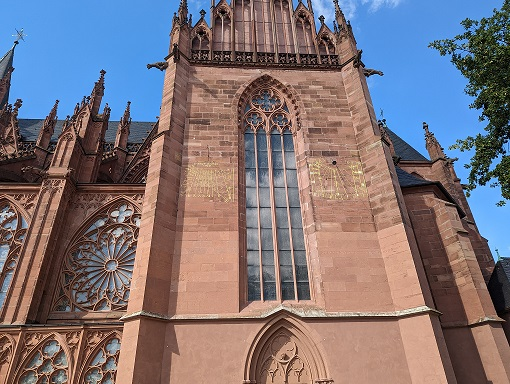

In [47]:
img = Image.open(photos[1])
img

In [48]:
# Opening a photo from projectwise drive
drive_path_list = ["C:\\ProjectWise\\Ohio DOT\\District 06 (Active Projects)\\Union\\112955\\400-Engineering\\Structures\\SFN_8002827\\EngData"]

list_of_files = build_file_list_from_path(Path(drive_path_list[0]))

photos = [ fi for fi in list_of_files if re.search("(svg|heif|bmp|tiff|webp|jpeg|png|jpg)$", str(fi), re.IGNORECASE)]

C:\ProjectWise\Ohio DOT\District 06 (Active Projects)\Union\112955\400-Engineering\Structures\SFN_8002827\EngData


File Found: C:\ProjectWise\Ohio DOT\District 06 (Active Projects)\Union\112955\400-Engineering\Structures\SFN_8002827\EngData/2023-03-20 - 112955 Site Visit - 8002827
Adding to list files in: C:\ProjectWise\Ohio DOT\District 06 (Active Projects)\Union\112955\400-Engineering\Structures\SFN_8002827\EngData\2023-03-20 - 112955 Site Visit - 8002827\2023-03-23 DRP Notes.txt
Adding to list files in: C:\ProjectWise\Ohio DOT\District 06 (Active Projects)\Union\112955\400-Engineering\Structures\SFN_8002827\EngData\2023-03-20 - 112955 Site Visit - 8002827\PXL_20230320_143912787.jpg
Adding to list files in: C:\ProjectWise\Ohio DOT\District 06 (Active Projects)\Union\112955\400-Engineering\Structures\SFN_8002827\EngData\2023-03-20 - 112955 Site Visit - 8002827\PXL_20230320_143920941.jpg
Adding to list files in: C:\ProjectWise\Ohio DOT\District 06 (Active Projects)\Union\112955\400-En

In [15]:
photo_dict_2 = {}

for photo in photos:
    exif = get_exif(photo)
    geo = get_geo(exif)
    photo_dict_2[photo] = geo

photo_dict_2

{'C:\\ProjectWise\\Ohio DOT\\District 06 (Active Projects)\\Union\\112955\\400-Engineering\\Structures\\SFN_8002827\\EngData\\2023-03-20 - 112955 Site Visit - 8002827\\PXL_20230320_143912787.jpg': {'GPSLatitudeRef': 'N',
  'GPSLatitude': (40.0, 13.0, 24.88),
  'GPSLongitudeRef': 'W',
  'GPSLongitude': (83.0, 27.0, 46.47),
  'GPSAltitudeRef': b'\x00',
  'GPSAltitude': 277.79,
  'GPSTimeStamp': (14.0, 39.0, 12.0),
  'GPSImgDirectionRef': 'M',
  'GPSImgDirection': 13.0,
  'GPSDateStamp': '2023:03:20'},
 'C:\\ProjectWise\\Ohio DOT\\District 06 (Active Projects)\\Union\\112955\\400-Engineering\\Structures\\SFN_8002827\\EngData\\2023-03-20 - 112955 Site Visit - 8002827\\PXL_20230320_143920941.jpg': {'GPSLatitudeRef': 'N',
  'GPSLatitude': (40.0, 13.0, 24.88),
  'GPSLongitudeRef': 'W',
  'GPSLongitude': (83.0, 27.0, 46.47),
  'GPSAltitudeRef': b'\x00',
  'GPSAltitude': 277.79,
  'GPSTimeStamp': (14.0, 39.0, 20.0),
  'GPSImgDirectionRef': 'M',
  'GPSImgDirection': 348.0,
  'GPSDateStamp': '202

In [16]:
list_of_files

['C:\\ProjectWise\\Ohio DOT\\District 06 (Active Projects)\\Union\\112955\\400-Engineering\\Structures\\SFN_8002827\\EngData\\2023-03-20 - 112955 Site Visit - 8002827\\2023-03-23 DRP Notes.txt',
 'C:\\ProjectWise\\Ohio DOT\\District 06 (Active Projects)\\Union\\112955\\400-Engineering\\Structures\\SFN_8002827\\EngData\\2023-03-20 - 112955 Site Visit - 8002827\\PXL_20230320_143912787.jpg',
 'C:\\ProjectWise\\Ohio DOT\\District 06 (Active Projects)\\Union\\112955\\400-Engineering\\Structures\\SFN_8002827\\EngData\\2023-03-20 - 112955 Site Visit - 8002827\\PXL_20230320_143920941.jpg',
 'C:\\ProjectWise\\Ohio DOT\\District 06 (Active Projects)\\Union\\112955\\400-Engineering\\Structures\\SFN_8002827\\EngData\\2023-03-20 - 112955 Site Visit - 8002827\\PXL_20230320_143937567.jpg',
 'C:\\ProjectWise\\Ohio DOT\\District 06 (Active Projects)\\Union\\112955\\400-Engineering\\Structures\\SFN_8002827\\EngData\\2023-03-20 - 112955 Site Visit - 8002827\\PXL_20230320_143947499.jpg',
 'C:\\ProjectWise

## import civilpy functions

In [17]:
from civilpy.state.ohio.dot import Project
import requests
import json
from bs4 import BeautifulSoup

In [18]:
full_data_url = "https://gis.dot.state.oh.us/arcgis/rest/services/TIMS/Projects/MapServer/0/33846832?f=pjson"

page = requests.get(full_data_url)
data_json = json.loads(page.content)

In [19]:
def get_project_data_from_tims(pid='112664'):
    url = f"https://gis.dot.state.oh.us/arcgis/rest/services/TIMS/Projects/MapServer/0/query?where=PID_NBR%3D{pid}&text=&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&relationParam=&outFields=&returnGeometry=true&returnTrueCurves=false&maxAllowableOffset=&geometryPrecision=&outSR=&having=&returnIdsOnly=true&returnCountOnly=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&returnZ=false&returnM=false&gdbVersion=&historicMoment=&returnDistinctValues=false&resultOffset=&resultRecordCount=&queryByDistance=&returnExtentOnly=false&datumTransformation=&parameterValues=&rangeValues=&quantizationParameters=&featureEncoding=esriDefault&f=html"

    page = requests.get(url)
    url_base = 'https://gis.dot.state.oh.us'
    soup = BeautifulSoup(page.content, 'html5lib')

    all_page_links = soup.find_all('a')
    project_point_links = {}
    counter = 0

    for link in all_page_links:
        print(link.text)
        if link.text.isnumeric():
            counter += 1
            full_data_url = url_base + link.get('href') + '?f=pjson'
            print(f"Retrieving data from url at {full_data_url}\n")

            page = requests.get(full_data_url)
            data_json = json.loads(page.content)
            temp = data_json
            
            try:
                extracted_data = data_json['feature']['attributes']
            except:
                return data_json

            project_point_links[link.text] = extracted_data

        else:
            data_json = ''

    project_point_links['no_of_pts'] = counter

    return project_point_links

In [20]:
test = get_project_data_from_tims('112664')
test

Home
services
TIMS
Projects (MapServer)
All Project Points
query
Help
API Reference
36507373
Retrieving data from url at https://gis.dot.state.oh.us/arcgis/rest/services/TIMS/Projects/MapServer/0/36507373?f=pjson

36507375
Retrieving data from url at https://gis.dot.state.oh.us/arcgis/rest/services/TIMS/Projects/MapServer/0/36507375?f=pjson



{'36507373': {'ObjectID': 36507373,
  'GIS_ID': 69795,
  'PID_NBR': 112664,
  'DISTRICT_NBR': 6,
  'LOCALE_SHORT_NME': 'D06',
  'COUNTY_NME': 'District 6',
  'PROJECT_NME': 'D06-FY23 Bridge Repair',
  'CONTRACT_TYPE': 'Standard Build',
  'PRIMARY_FUND_CATEGORY_TXT': 'District Preservation (Pv & Br)',
  'PROJECT_MANAGER_NME': 'PARKS, DANE RICHARD',
  'RESERVOIR_YEAR': None,
  'TIER': None,
  'ODOT_LETTING': 'ODOT Let',
  'SCHEDULE_TYPE_SHORT_NME': 'Standard',
  'ENV_PROJECT_MANAGER_NME': 'GARTNER, JANICE M',
  'AREA_ENGINEER_NME': 'WISE, DANIEL S',
  'PROJECT_ENGINEER_NME': 'FIRIS, BENJAMIN L',
  'DESIGN_AGENCY': 'DISTRICT 6-ENGINEERING',
  'SPONSORING_AGENCY': 'DISTRICT 6-BRIDGES',
  'PDP_SHORT_NAME': 'Path 1',
  'PRIMARY_WORK_CATEGORY': 'Bridge Preservation',
  'PROJECT_STATUS': 'Filed',
  'FISCAL_YEAR': '2023',
  'INHOUSE_DESIGN_FULL_NME': 'BLOOR, CLAYTON  ',
  'EST_TOTAL_CONSTR_COST': 306313.77,
  'STATE_PROJECT_NBR': None,
  'CONSTR_VENDOR_NME': None,
  'STIP_FLAG': None,
  'CURREN

In [21]:
single_dict = test[list(test.keys())[0]]

In [22]:
single_dict

{'ObjectID': 36507373,
 'GIS_ID': 69795,
 'PID_NBR': 112664,
 'DISTRICT_NBR': 6,
 'LOCALE_SHORT_NME': 'D06',
 'COUNTY_NME': 'District 6',
 'PROJECT_NME': 'D06-FY23 Bridge Repair',
 'CONTRACT_TYPE': 'Standard Build',
 'PRIMARY_FUND_CATEGORY_TXT': 'District Preservation (Pv & Br)',
 'PROJECT_MANAGER_NME': 'PARKS, DANE RICHARD',
 'RESERVOIR_YEAR': None,
 'TIER': None,
 'ODOT_LETTING': 'ODOT Let',
 'SCHEDULE_TYPE_SHORT_NME': 'Standard',
 'ENV_PROJECT_MANAGER_NME': 'GARTNER, JANICE M',
 'AREA_ENGINEER_NME': 'WISE, DANIEL S',
 'PROJECT_ENGINEER_NME': 'FIRIS, BENJAMIN L',
 'DESIGN_AGENCY': 'DISTRICT 6-ENGINEERING',
 'SPONSORING_AGENCY': 'DISTRICT 6-BRIDGES',
 'PDP_SHORT_NAME': 'Path 1',
 'PRIMARY_WORK_CATEGORY': 'Bridge Preservation',
 'PROJECT_STATUS': 'Filed',
 'FISCAL_YEAR': '2023',
 'INHOUSE_DESIGN_FULL_NME': 'BLOOR, CLAYTON  ',
 'EST_TOTAL_CONSTR_COST': 306313.77,
 'STATE_PROJECT_NBR': None,
 'CONSTR_VENDOR_NME': None,
 'STIP_FLAG': None,
 'CURRENT_STIP_CO_AMT': None,
 'PROJECT_PLANS_URL

# Connecting to a website in a browser

need to check your browser [version here](edge://settings/help) and download your driver [version here](https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/#downloads) (ODOT internal, use the appropriate driver for the browser you like best, like firefox)

In [23]:
import os
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.wait import WebDriverWait


import warnings
warnings.filterwarnings('ignore')

driver = webdriver.Edge(r"C:\Users\dparks1\Downloads\edgedriver_win32\msedgedriver.exe")
driver.get('https://connect.bentley.com')
print(f"Page title: {driver.title}")

Page title: Sign In


Authenticate into bentley's systems, for odot users, first screen is your ODOT email, second; user is your ODOT username/pasword so for me user=`dot/dparks1` password=`hahajk****59`

replace my credentials with the appropriate user's

In [24]:
# Save your credentials as an environment variable (don't send the file with your cred...)
# os.environ["BENTLEYPASSWORD"] = "hahajk****59"

Wait for the page to load, find the sign in and password fields, and attempt to sign in

//TODO - Fix these

## Assetwise sign-in

In [25]:
import os
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.wait import WebDriverWait

import warnings
warnings.filterwarnings('ignore')

driver = webdriver.Edge(r"C:\Users\dparks1\Downloads\edgedriver_win32\msedgedriver.exe")
driver.get('https://ohiodot-it.bentley.com/login.aspx')
print(f"Page title: {driver.title}")

Page title: Bentley® AssetWise Inspections™


In [26]:
# Wait until the username box appears, then select it
WebDriverWait(driver, timeout=5).until(lambda d: d.find_element(By.ID, 'ContentPlaceHolder1_cmdOIDCLogin'))

IMS_Login = driver.find_element(By.ID, 'ContentPlaceHolder1_cmdOIDCLogin')
IMS_Login.click()

driver.find_element(By.ID, 'identifierInput').send_keys('dane.parks@dot.ohio.gov')
next_button = driver.find_element(By.ID, 'sign-in-button')
next_button.click()

In [27]:
WebDriverWait(driver, timeout=5).until(lambda d: d.find_element(By.ID, 'txtQuickSelect'))
driver.find_element(By.ID, 'txtQuickSelect').send_keys('2508559')
driver.find_element(By.ID, 'txtQuickSelect').send_keys(Keys.RETURN)

TimeoutException: Message: 


# Open a Pdf File to a Specific Page (BlueBeam)

In [28]:
import subprocess
import os

path_to_pdf = os.path.abspath('C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\ODOT_sample_plans.pdf')
# I am testing this on my Windows Install machine
path_to_acrobat = os.path.abspath("C:\\Program Files\\Bluebeam Software\\Bluebeam Revu\\20\\Revu\\Revu.exe") 

# this will open your document on page 12
process = subprocess.Popen([path_to_acrobat, '/A', 'page=12', path_to_pdf], shell=False, stdout=subprocess.PIPE)
process.wait()

0

# Open a Pdf Page into Memory

In [ ]:
os.getcwd()

# 3D Point Clouds

Working with point clouds in native python is a pain, use [Cloud Compare](https://www.danielgm.net/cc/) if you have to work with a weird format resize, convert or reconfigure youre point cloud data.

[Based on Florent Poux's blog](https://towardsdatascience.com/how-to-automate-3d-point-cloud-segmentation-and-clustering-with-python-343c9039e4f5)

[Creating meshes from clouds](https://towardsdatascience.com/5-step-guide-to-generate-3d-meshes-from-point-clouds-with-python-36bad397d8ba)

QGIS is a good tool for viewing what back end stuff is going on visually.

In [ ]:
import numpy as np
import open3d as o3d

input_path = 'C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\'
output_path = 'C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\'
dataname = '0617_Cloud.xyz'

In [ ]:
import numpy as np
import laspy as lp

file_path = "C:\\Users\\dparks1\\PycharmProjects\\civilpy\\res\\0617.laz"

point_cloud=lp.read(file_path)

In [ ]:
points = np.vstack((point_cloud.x, point_cloud.y, point_cloud.z)).transpose()
colors = np.vstack((point_cloud.red, point_cloud.green, point_cloud.blue)).transpose()

preview of resulting image

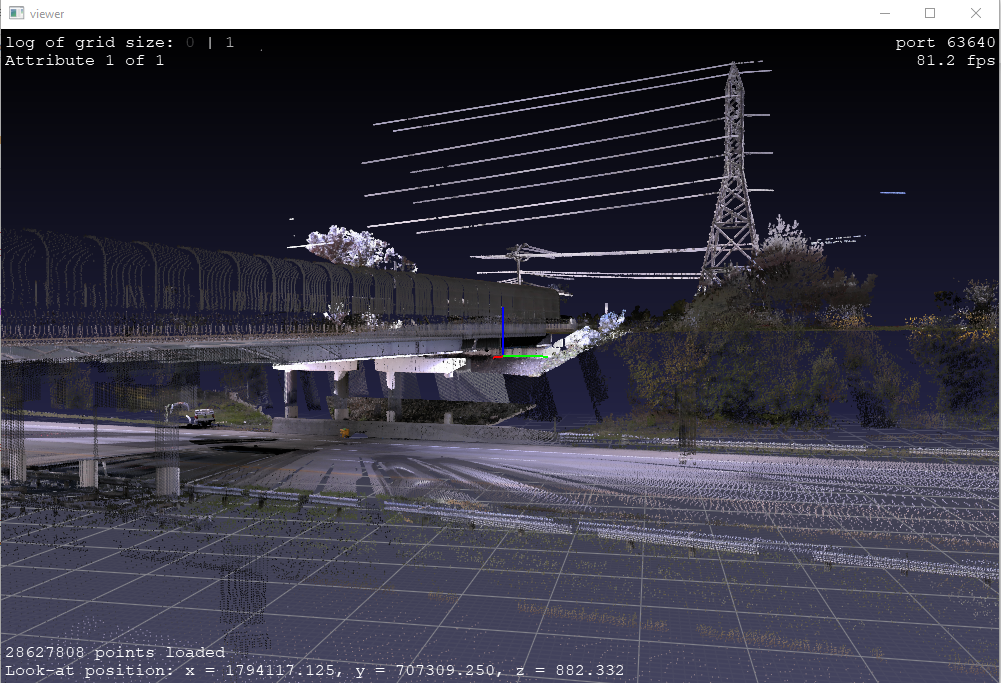

The resulting point cloud has to be refined into usable objects and corrected, some of the tools for visualizing data in various ways are shown.

To make a selection and filter out the data for it (for example a car/truck), go to top view (shortcut `7`) and make a selection by dragging a rectangle selection holding `ctrl` + `LMB`

![selection_demo](https://miro.medium.com/v2/resize:fit:640/1*Hd6oHUq1h4wwS7kvvEI4Rw.gif)

# ODOT Database Connections

## List All Databases on the Server

In [1]:
import pyodbc 
# Some other example server values are
cnxn = pyodbc.connect(r'Driver=SQL Server;Server=doticsqlp31;Database=TIMS;Trusted_Connection=yes;')
cursor = cnxn.cursor()

In [4]:
#Sample select query
cursor.execute("SELECT name, database_id, create_date FROM sys.databases;") 
row = cursor.fetchone() 
while row: 
    print(row[0])
    row = cursor.fetchone()

master
tempdb
model
msdb
TIMS_IIS_APP
TIMS
DBAdmin
Apollo
Collector
RIMSTDS
NewProducts
GIS
ODOTREF
FuelMasterPlusSQL_ETL
FuelMasterPlusSQL
AVIFuelMasterPlusSQL
BridgePhoto
CALLACCOUNTING
Inventory
AD_METADATA
ODOT_Photos
Core_v2
CourseMillExternal
Logs_v2
GEOLIMS
S2PhotoIDBadging
SSISDB
Milestone_Facilities
ELLIS
Spatial_v1
QCQA
geocue
HPIPSC
HPWJA
ExpressDB
CitrixODOTLogging
CitrixODOTMonitoring
CitrixODOTSite
CitrixProvisioning
MaxView_Report
MaxView_1.9.0.745
OHGOInsight_OctopusDeploy
CADD_GIS
HPACIRM
HPACJA
TAMDST_WAREHOUSE
KEPI
MaxView_EventLog_1.9.0.745
TAM
Skid
HIMS
FalconGeoMS
KBase
FalconTSRV
RIMS
Milestone_Traffic
Milestone_TrafficLogServer
Mediasite7DB
Mediasite7Site
FARS
CTXCloud
GoFormzQueue
PDQ
DPXE5
OHGOInsight
TAMCollector
CPQ
Collector2
dTIMSAuth
DTIMS_BA_STAGE
DTIMS_BA_REVIEW
DTIMS_BA_PLAN
Milestone_FacilitiesLogServerV2
CSSCES
AppropriationsAccounting
RealOS
Milestone_TrafficLogServerV2
AwpEvents
ARMS
CIV
CourseMillExternalNew
Milestone_Traffic_IDP
Mediasite8DB
Medi

### GIS

In [4]:
import pyodbc
import pandas as pd
# Some other example server values are
cnxn = pyodbc.connect(r'Driver=SQL Server;Server=doticsqlp31;Database=GIS;Trusted_Connection=yes;')
cursor = cnxn.cursor()

In [5]:
#Sample select query
cursor.execute("SELECT @@version;") 
row = cursor.fetchone() 
while row: 
    print(row[0])
    row = cursor.fetchone()

Microsoft SQL Server 2019 (RTM-CU13) (KB5005679) - 15.0.4178.1 (X64) 
	Sep 23 2021 16:47:49 
	Copyright (C) 2019 Microsoft Corporation
	Enterprise Edition: Core-based Licensing (64-bit) on Windows Server 2016 Standard 10.0 <X64> (Build 14393: ) (Hypervisor)



#### Display all tables in the GIS database

In [6]:
# Uncomment to run
for row in cursor.tables():
    print(row.table_name)

AccidentReporting
ADA_COMBINE
ADA_CROSSWALK
ADA_CURB_RAMP
ADA_ON_STREET_PARKING
ADA_REFUGE_ISLAND
ADA_SIDEWALK
ALLASSETCOMBINE
ALLASSETCOMBINE2
ALLASSETPROJECTS
ALLEIMSWR
AssetConstructionList
BARRIER
BARRIER_REDLINE
BIKE_PATHS
BIKE_TRAIL_HEADS
BIKEPOINTS
BMP_LINEAR
BMP_POINT
BMPCOMBINE
BMPCOMBINEINSP
BRIDGEGACHANGE
CEANDI_EIMS_CHARGES
CEANDI_REPORT
CONSTRUCTION_TRACKER
CONVERSIONSTATUS
CPA_TRACKER
CULVERTGACHANGE
CULVERTS
D1BIKEPATHS
D1BMPWITHCTLOG
DESIGNLINE
DESIGNPOINT
DESIGNPOLYGON
DESIGNPROJECTLIMITS
DGN_PROJECTIONS
DGNPROJECTIONS
DGNTEST
DTIMS
EIMS_Wo_Line
EIMS_Wo_Point
EIMSWO
EIMSWOBRIDGEPROJECTS
EIMSWOCULVERTPROJECTS
EIMSWOLINEARPROJECTS
EIMSWOSPOTSPROJECTS
EIMSWR
EIMSWRBRIDGEPROJECTS
EIMSWRCULVERTPROJECTS
EIMSWRLINEARPROJECTS
EIMSWRSPOTSPROJECTS
ELLIS_PROJECT_MILESTONES
ELLISAWARDS
ELLISBRIDGEPROJECTS
ELLISCULVERTPROJECTS
ELLISLINEARPROJECTS
ELLISPROJECTINFO
ELLISSNIFFER
ELLISSPOTSPROJECTS
FMETEST
FormStack_Survey
HANUS30INTERSECTIONS
i12989
i13758
i14709
i15159
i15182
i15183


#### All Columns in the 'BRIDGES_FROM_SMS' Table

In [7]:
# Sample select query to get bridges from TIMS (41s in powerBI)
query = """
SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'BRIDGES_FROM_SMS';
"""
cursor.execute(query) 
row = cursor.fetchone() 
while row: 
    print(row[0])
    row = cursor.fetchone()

ANALYZED_BY
APPRH_ALGN_CD
APPRH_GUARDRAIL_CD
APPRH_PAV_GRD_CD
APPRH_PAV_MATL_CD
APPRH_RDW_WD
APPRH_SLAB_LEN
APPRH_SLAB_SW
APPRH_SPANS
APPRH_STR_DESCR_CD
APPRH_STR_MTL_CD
APPRH_STR_TYPE_CD
APPRH_STRUC_TYPE
BARS_CD
BEARING_DEVICE1_CD
BEARING_DEVICE2_CD
BRG_RDW_WD
BRG_STAT_CD
BTRS_LINK_NBR
BYPASS_LEN
CALC_DECK_GEOM
CALC_STR_EVAL
CALC_UNDC
CHAN_PROT_TYPE_CD
COMPOSITE_STR_CD
COUNTY_CD
CULV_HWL_EWL_CD
CULVERT_FILL_DEPTH
CULVERT_LEN
CULVERT_SUFF_DFLT
CULVERT_TYP_CD
CURB_SIDW_MTL_L
CURB_SIDW_MTL_R
CURB_SIDW_TYP_L
CURB_SIDW_TYP_R
DECK_AREA
DECK_CD
DECK_CONC_TYP_CD
DECK_DRN_CD
DECK_PROT_EXTL_CD
DECK_PROT_INT_CD
DECK_WD
DEFIC_FUNC_RATING
DESIGN_LOAD_CD
DIR_TRAFFIC_CD
DISTRICT
ELAS_STRP_RETR1_CD
ELAS_STRP_RETR2_CD
ELAS_STRP_RETR3_CD
ELAS_STRP_TROU1_SW
ELAS_STRP_TROU2_SW
ELAS_STRP_TROU3_SW
EXPN_JOINT1_CD
EXPN_JOINT2_CD
EXPN_JOINT3_CD
FIPS_CD
FUNC_CLAS_CD
FUTURE_ADT
FUTURE_ADT_YR
HAUNCH_GIRD_DEPTH
HAUNCH_GIRD_SW
HINGE_CD
HORIZ_CRV_RADIUS
HS_OPR_RAT
INVENT_COUNTY
INVENT_DIR_SFX_CD
INVENT_FEAT
INVENT_

#### Defining Return Values for Python's PYODBC Cursor

[Documentation](https://github.com/mkleehammer/pyodbc/wiki/Cursor#columnstablenone-catalognone-schemanone-columnnone)

```python 
1: 'table_cat', 
2: 'table_schem', 
3: 'table_name', 
4: 'column_name', 
5: 'data_type', 
6: 'type_name', 
7: 'column_size', 
8: 'buffer_length', 
9: 'decimal_digits', 
10: 'num_prec_radix', 
11: 'nullable', 
12: 'remarks', 
13: 'column_def', 
14: 'sql_data_type', 
15: 'sql_datetime_sub', 
16: 'char_octet_length', 
17: 'ordinal_position', 
18: 'is_nullable: One of SQL_NULLABLE, SQL_NO_NULLS, SQL_NULLS_UNKNOWN.'
```

In [14]:
for row in cursor.columns(table='BRIDGES_FROM_SMS'):
    print(row)

('GIS', 'D04', 'BRIDGES_FROM_SMS', 'OBJECTID', 4, 'int', 10, 4, 0, 10, 0, None, None, 4, None, None, 1, 'NO', 56)
('GIS', 'D04', 'BRIDGES_FROM_SMS', 'SFN', -9, 'nvarchar', 200, 400, None, None, 1, None, None, -9, None, 400, 2, 'YES', 39)
('GIS', 'D04', 'BRIDGES_FROM_SMS', 'COUNTY_CD', -9, 'nvarchar', 200, 400, None, None, 1, None, None, -9, None, 400, 3, 'YES', 39)
('GIS', 'D04', 'BRIDGES_FROM_SMS', 'ROUTE', -9, 'nvarchar', 200, 400, None, None, 1, None, None, -9, None, 400, 4, 'YES', 39)
('GIS', 'D04', 'BRIDGES_FROM_SMS', 'SLM', -9, 'nvarchar', 200, 400, None, None, 1, None, None, -9, None, 400, 5, 'YES', 39)
('GIS', 'D04', 'BRIDGES_FROM_SMS', 'SLK', -9, 'nvarchar', 200, 400, None, None, 1, None, None, -9, None, 400, 6, 'YES', 39)
('GIS', 'D04', 'BRIDGES_FROM_SMS', 'DISTRICT', -9, 'nvarchar', 200, 400, None, None, 1, None, None, -9, None, 400, 7, 'YES', 39)
('GIS', 'D04', 'BRIDGES_FROM_SMS', 'BARS_CD', -9, 'nvarchar', 200, 400, None, None, 1, None, None, -9, None, 400, 8, 'YES', 39)
(

#### Using the Schema Definition from above to read data

[documentation for `cursor.description`](https://github.com/mkleehammer/pyodbc/wiki/Cursor#attributes)


```python
1: 'Column Name', 
2: 'Type Code', 
3: 'Display Size', 
4: 'Internal Size', 
5: 'Precision', 
6: 'Scale', 
7: 'Nullable'
```

In [15]:
from pprint import pprint

columns = [column for column in cursor.description]

pprint([column for column in cursor.description])

[('table_cat', <class 'str'>, None, 128, 128, 0, True),
 ('table_schem', <class 'str'>, None, 128, 128, 0, True),
 ('table_name', <class 'str'>, None, 128, 128, 0, False),
 ('column_name', <class 'str'>, None, 128, 128, 0, False),
 ('data_type', <class 'int'>, None, 5, 5, 0, False),
 ('type_name', <class 'str'>, None, 128, 128, 0, False),
 ('column_size', <class 'int'>, None, 10, 10, 0, True),
 ('buffer_length', <class 'int'>, None, 10, 10, 0, True),
 ('decimal_digits', <class 'int'>, None, 5, 5, 0, True),
 ('num_prec_radix', <class 'int'>, None, 5, 5, 0, True),
 ('nullable', <class 'int'>, None, 5, 5, 0, False),
 ('remarks', <class 'str'>, None, 254, 254, 0, True),
 ('column_def', <class 'str'>, None, 4000, 4000, 0, True),
 ('sql_data_type', <class 'int'>, None, 5, 5, 0, False),
 ('sql_datetime_sub', <class 'int'>, None, 5, 5, 0, True),
 ('char_octet_length', <class 'int'>, None, 10, 10, 0, True),
 ('ordinal_position', <class 'int'>, None, 10, 10, 0, False),
 ('is_nullable', <class 's

In [35]:
# Create a dict to use readable names instead of indexes
col_labels = {}
columns = [row for row in cursor.columns(table='BRIDGES_FROM_SMS')]
keys = range(len(columns))

for i, column in enumerate(columns):
    col_labels[column[3]] = i
    i += 1

In [37]:
pprint(col_labels.keys())

dict_keys(['OBJECTID', 'SFN', 'COUNTY_CD', 'ROUTE', 'SLM', 'SLK', 'DISTRICT', 'BARS_CD', 'FIPS_CD', 'INVENT_ON_UND_CD', 'INVENT_HWY_SYS_CD', 'INVENT_ROUTE', 'INVENT_DIR_SFX_CD', 'INVENT_HWY_DSGT_CD', 'INVENT_PREF_RTE', 'INVENT_FEAT', 'INVENT_COUNTY', 'INVENT_SPCL_DSGT', 'DIR_TRAFFIC_CD', 'PARALLEL_STR_CD', 'INVENT_NHS_CD', 'MACRO_CORRIDOR_SW', 'FUNC_CLAS_CD', 'MIN_HORIZ_CLR_NC', 'MIN_HORIZ_CLR_C', 'BYPASS_LEN', 'TOLL_CD', 'LANES_ON', 'LANES_UND', 'HORIZ_CRV_RADIUS', 'SKEW_DEG', 'DESIGN_LOAD_CD', 'APPRH_RDW_WD', 'BRG_RDW_WD', 'DECK_WD', 'MEDIAN_TYP1_CD', 'MEDIAN_TYP2_CD', 'MEDIAN_TYP3_CD', 'MEDIAN_CD', 'SIDW_WD_L', 'SIDW_WD_R', 'CURB_SIDW_MTL_L', 'CURB_SIDW_TYP_L', 'CURB_SIDW_MTL_R', 'CURB_SIDW_TYP_R', 'COMPOSITE_STR_CD', 'RAILING_TYP_CD', 'DECK_DRN_CD', 'DECK_CD', 'DECK_PROT_EXTL_CD', 'DECK_PROT_INT_CD', 'DECK_CONC_TYP_CD', 'WEARING_SURF_CD', 'WEARING_SURF_THCK', 'MAIN_SPANS', 'MAIN_STR_MTL_CD', 'MAIN_STR_TYPE_CD', 'MAIN_STR_DESCR_CD', 'APPRH_SPANS', 'APPRH_SLAB_SW', 'APPRH_SLAB_LEN', 

In [43]:
cursor.execute("select * FROM GIS.D04.BRIDGES_FROM_SMS")

print('OBJECTID, SFN, SUFF_RATING')

row = cursor.fetchone() 
while row: 
    print(row[col_labels['OBJECTID']], row[col_labels['SFN']], row[col_labels['SUFF_RATING']])
    row = cursor.fetchone()

OBJECTID, SFN, SUFF_RATING
1 0400041 096.8
2 0400068 090.5
3 0400106 097.2
4 0400130 093.9
5 0400165 098.2
6 0400173 095.9
7 0400238 098.2
8 0400246 058.5
9 0400270 092.0
10 0400289 093.4
11 0400297 088.4
12 0400300 091.9
13 0400319 097.4
14 0400335 099.0
15 0400408 097.1
16 0400432 094.2
17 0400467 097.1
18 0400475 098.9
19 0400505 100.0
20 0400556 100.0
21 0400572 100.0
22 0400602 095.0
23 0400629 100.0
24 0400653 098.0
25 0400688 093.8
26 0400718 094.7
27 0400734 095.3
28 0400750 100.0
29 0400793 100.0
30 0400823 098.6
31 0400882 096.3
32 0400904 089.3
33 0400947 096.4
34 0400955 096.9
35 0400963 096.9
36 0401021 092.1
37 0401048 N/A  
38 0401056 N/A  
39 0401064 080.0
40 0401072 085.0
41 0401080 099.7
42 0401099 084.9
43 0401102 084.9
44 0401110 099.7
45 0401129 082.3
46 0401137 084.9
47 0401145 099.7
48 0401153 085.0
49 0401161 096.0
50 0401188 084.9
51 0401196 084.9
52 0401218 081.4
53 0401234 099.7
54 0401269 099.7
55 0401293 099.7
56 0401307 084.7
57 0401315 084.8
58 0401323 09

### Bridge Photos

In [51]:
cnxn = pyodbc.connect(r'Driver=SQL Server;Server=doticsqlp31;Database=BridgePhoto;Trusted_Connection=yes;') # Not sure if this doesn't exist or I don't have permission
cursor = cnxn.cursor()

ProgrammingError: ('42000', '[42000] [Microsoft][ODBC SQL Server Driver][SQL Server]Cannot open database "BridgePhoto" requested by the login. The login failed. (4060) (SQLDriverConnect); [42000] [Microsoft][ODBC SQL Server Driver][SQL Server]Cannot open database "BridgePhoto" requested by the login. The login failed. (4060)')

### Collector

In [52]:
cnxn = pyodbc.connect(r'Driver=SQL Server;Server=doticsqlp31;Database=Collector;Trusted_Connection=yes;') # Not sure if this doesn't exist or I don't have permission
cursor = cnxn.cursor()

ProgrammingError: ('42000', '[42000] [Microsoft][ODBC SQL Server Driver][SQL Server]Cannot open database "Collector" requested by the login. The login failed. (4060) (SQLDriverConnect); [42000] [Microsoft][ODBC SQL Server Driver][SQL Server]Cannot open database "Collector" requested by the login. The login failed. (4060)')

### TIMS

In [53]:
cnxn = pyodbc.connect(r'Driver=SQL Server;Server=doticsqlp31;Database=TIMS;Trusted_Connection=yes;') # Not sure if this doesn't exist or I don't have permission
cursor = cnxn.cursor()

#### Dispalay all tables in the TIMS database

In [54]:
# Uncomment to run
for row in cursor.tables():
    print(row.table_name)

Datasets
Fields
GDB_CONFLICTS
GDB_ITEMRELATIONSHIPS
GDB_ITEMRELATIONSHIPTYPES
GDB_ITEMS
GDB_ITEMTYPES
GDB_LOCKS
GDB_REPLICALOG
GDB_TABLES_LAST_MODIFIED
i10
i5
i6
i7
i8
i9
SDE_archives
SDE_branch_tables_modified
SDE_branches
SDE_column_registry
SDE_compress_log
SDE_dbtune
SDE_geometry_columns
SDE_GEOMETRY1
SDE_layer_locks
SDE_layer_stats
SDE_layers
SDE_lineages_modified
SDE_locators
SDE_logfile_pool
SDE_metadata
SDE_multibranch_tables
SDE_mvtables_modified
SDE_object_ids
SDE_object_locks
SDE_process_information
SDE_raster_columns
SDE_server_config
SDE_spatial_references
SDE_state_lineages
SDE_state_locks
SDE_states
SDE_table_locks
SDE_table_registry
SDE_tables_last_edit_time
SDE_tables_modified
SDE_version
SDE_versions
SDE_xml_columns
SDE_xml_index_tags
SDE_xml_indexes
sysdiagrams
trace_xe_action_map
trace_xe_event_map
a100
a101
a102
a103
a104
a105
a106
a107
a108
a109
a110
a111
a112
a113
a114
a125
a130
a188
a207
a212
a213
a222
a223
a23
a244
a245
a25
a259
a26
a266
a267
a268
a27
a28
a285


# Index

In [ ]:
# List of ODOT Databases
ODOT_DBS = [
    "TIMS", # Primary TIMS Database
    "Collector2", # Culvert Collector Application? not sure what the difference is between these two
    "Collector", 
    "Inventory", 
    "AD_METADATA", 
    "Apollo", 
    "AppropriationsAccounting", 
    "ARMS", 
    "ARS", 
    "AVIFuelMasterPlusSQL", 
    "AwpEvents", 
    "BridgePhoto", # Is there nothing in this?
    "CADD_GIS", 
    "CALLACCOUNTING",
    "cashforecasting", 
    "CitrixODOTLogging", 
    "CitrixODOTMonitoring", 
    "CitrixODOTSite", 
    "CitrixProvisioning", 
    "CIV", 
    "Core_v2", 
    "CourseMillExternal", 
    "CourseMillExternalNew", 
    "CPQ", 
    "CSSCES", 
    "CTXCloud", 
    "DataGovernance", 
    "DBAdmin", 
    "DPXE5", 
    "DTIMS_BA_PLAN", 
    "DTIMS_BA_REVIEW", 
    "DTIMS_BA_STAGE", 
    "dTIMSAuth", 
    "ELLIS", # Ellis Project information?
    "ExpressDB", 
    "FalconGeoMS", 
    "FalconTSRV", 
    "FARS", 
    "FuelMasterPlusSQL", 
    "FuelMasterPlusSQL_ETL", 
    "geocue", 
    "GEOLIMS", 
    "GIS", 
    "GoFormzQueue", 
    "HIMS", 
    "Horizon", 
    "HorizonLibrary", 
    "HPACIRM", 
    "HPACJA", 
    "HPACJATEST", 
    "HPIPSC", 
    "HPWJA", 
    "KBase", 
    "KEPI", 
    "Logs_v2", 
    "MaxView_1.9.0.745", 
    "MaxView_EventLog_1.9.0.745", 
    "MaxView_Report", 
    "Mediasite7DB", 
    "Mediasite7Site", 
    "Mediasite8DB", 
    "Mediasite8Site", 
    "Mediasite87DB", 
    "Mediasite87Site", 
    "METS", 
    "METS_SQL", 
    "Milestone_Facilities", 
    "Milestone_Facilities_IDP", 
    "Milestone_FacilitiesLogServerV2", 
    "Milestone_Traffic", 
    "Milestone_Traffic_IDP", 
    "Milestone_TrafficLogServer", 
    "Milestone_TrafficLogServerV2", 
    "NewProducts", 
    "OAAS", 
    "ODOT_Photos", 
    "ODOTREF", 
    "OHCCI", 
    "OHGOInsight", 
    "OHGOInsight_OctopusDeploy", 
    "PDQ", 
    "PPCOA", 
    "QCQA", 
    "RealOS", 
    "RIMS", 
    "RIMSTDS", 
    "S2PhotoIDBadging", 
    "SecretServer", 
    "SKid", 
    "Spatial_v1", 
    "SQLPerf", 
    "SSISDB", 
    "ssos", 
    "TAM", 
    "TAMCollector", 
    "TAMDST_WAREHOUSE", 
    "TIMS_IIS_APP", 
    "TSMO", 
    "WZDB"
]

In [ ]:
# List of TIMS Tables
TIMS_Tables = [
    "Datasets",
    "Fields",
    "GDB_CONFLICTS",
    "GDB_ITEMRELATIONSHIPS",
    "GDB_ITEMRELATIONSHIPTYPES",
    "GDB_ITEMS",
    "GDB_ITEMTYPES",
    "GDB_LOCKS",
    "GDB_REPLICALOG",
    "GDB_TABLES_LAST_MODIFIED",
    "i10",
    "i5",
    "i6",
    "i7",
    "i8",
    "i9",
    "SDE_archives",
    "SDE_branch_tables_modified",
    "SDE_branches",
    "SDE_column_registry",
    "SDE_compress_log",
    "SDE_dbtune",
    "SDE_geometry_columns",
    "SDE_GEOMETRY1",
    "SDE_layer_locks",
    "SDE_layer_stats",
    "SDE_layers",
    "SDE_lineages_modified",
    "SDE_locators",
    "SDE_logfile_pool",
    "SDE_metadata",
    "SDE_multibranch_tables",
    "SDE_mvtables_modified",
    "SDE_object_ids",
    "SDE_object_locks",
    "SDE_process_information",
    "SDE_raster_columns",
    "SDE_server_config",
    "SDE_spatial_references",
    "SDE_state_lineages",
    "SDE_state_locks",
    "SDE_states",
    "SDE_table_locks",
    "SDE_table_registry",
    "SDE_tables_last_edit_time",
    "SDE_tables_modified",
    "SDE_version",
    "SDE_versions",
    "SDE_xml_columns",
    "SDE_xml_index_tags",
    "SDE_xml_indexes",
    "sysdiagrams",
    "trace_xe_action_map",
    "trace_xe_event_map",
    "a100",
    "a101",
    "a102",
    "a103",
    "a104",
    "a105",
    "a106",
    "a107",
    "a108",
    "a109",
    "a110",
    "a111",
    "a112",
    "a113",
    "a114",
    "a125",
    "a130",
    "a145",
    "a146",
    "a147",
    "a188",
    "a207",
    "a212",
    "a213",
    "a222",
    "a223",
    "a23",
    "a244",
    "a245",
    "a25",
    "a259",
    "a26",
    "a266",
    "a267",
    "a268",
    "a27",
    "a28",
    "a285",
    "a29",
    "a295",
    "a296",
    "a30",
    "a300",
    "a301",
    "a31",
    "a320",
    "a321",
    "a322",
    "a323",
    "a324",
    "a325",
    "a33",
    "a34",
    "a35",
    "a36",
    "a37",
    "a38",
    "a39",
    "a40",
    "a41",
    "a42",
    "a49",
    "a51",
    "a52",
    "a53",
    "a54",
    "a55",
    "a56",
    "a57",
    "a58",
    "a64",
    "a66",
    "a67",
    "a69",
    "a70",
    "a71",
    "a73",
    "a74",
    "a75",
    "a76",
    "a77",
    "a78",
    "a79",
    "a80",
    "a81",
    "a82",
    "a83",
    "a84",
    "a85",
    "a87",
    "a88",
    "a92",
    "a93",
    "a94",
    "a95",
    "a96",
    "a98",
    "a99",
    "COUNTY_LINEANNO",
    "CR_FIPS",
    "cr_fips_02102020",
    "D100",
    "D101",
    "D102",
    "D103",
    "D104",
    "D105",
    "D106",
    "D107",
    "D108",
    "D109",
    "D110",
    "D111",
    "D112",
    "D113",
    "D114",
    "D125",
    "D130",
    "D145",
    "D146",
    "D147",
    "D188",
    "D207",
    "D212",
    "D213",
    "D222",
    "D223",
    "D23",
    "D244",
    "D245",
    "D25",
    "D259",
    "D26",
    "D266",
    "D267",
    "D268",
    "D27",
    "D28",
    "D285",
    "D29",
    "D295",
    "D296",
    "D30",
    "D300",
    "D301",
    "D31",
    "D320",
    "D321",
    "D322",
    "D323",
    "D324",
    "D325",
    "D33",
    "D34",
    "D35",
    "D36",
    "D37",
    "D38",
    "D39",
    "D40",
    "D41",
    "D42",
    "D49",
    "D51",
    "D52",
    "D53",
    "D54",
    "D55",
    "D56",
    "D57",
    "D58",
    "D64",
    "D66",
    "D67",
    "D69",
    "D70",
    "D71",
    "D73",
    "D74",
    "D75",
    "D76",
    "D77",
    "D78",
    "D79",
    "D80",
    "D81",
    "D82",
    "D83",
    "D84",
    "D85",
    "D87",
    "D88",
    "D92",
    "D93",
    "D94",
    "D95",
    "D96",
    "D98",
    "D99",
    "i100",
    "i101",
    "i102",
    "i103",
    "i104",
    "i105",
    "i106",
    "i107",
    "i108",
    "i109",
    "i110",
    "i111",
    "i112",
    "i113",
    "i114",
    "i125",
    "i130",
    "i145",
    "i146",
    "i147",
    "i185",
    "i186",
    "i188",
    "i196",
    "i207",
    "i212",
    "i213",
    "i222",
    "i223",
    "i23",
    "i242",
    "i244",
    "i245",
    "i247",
    "i248",
    "i249",
    "i25",
    "i250",
    "i251",
    "i252",
    "i254",
    "i255",
    "i256",
    "i257",
    "i258",
    "i259",
    "i26",
    "i260",
    "i266",
    "i267",
    "i268",
    "i27",
    "i276",
    "i28",
    "i282",
    "i283",
    "i284",
    "i285",
    "i286",
    "i287",
    "i288",
    "i289",
    "i29",
    "i290",
    "i291",
    "i292",
    "i293",
    "i295",
    "i296",
    "i297",
    "i299",
    "i30",
    "i300",
    "i301",
    "i302",
    "i303",
    "i304",
    "i305",
    "i306",
    "i307",
    "i308",
    "i309",
    "i31",
    "i310",
    "i311",
    "i312",
    "i313",
    "i314",
    "i315",
    "i316",
    "i317",
    "i320",
    "i321",
    "i322",
    "i323",
    "i324",
    "i325",
    "i326",
    "i33",
    "i34",
    "i35",
    "i36",
    "i37",
    "i38",
    "i39",
    "i40",
    "i41",
    "i42",
    "i49",
    "i51",
    "i52",
    "i53",
    "i54",
    "i55",
    "i56",
    "i57",
    "i58",
    "i64",
    "i66",
    "i67",
    "i69",
    "i70",
    "i71",
    "i73",
    "i74",
    "i75",
    "i76",
    "i77",
    "i78",
    "i79",
    "i80",
    "i81",
    "i82",
    "i83",
    "i84",
    "i85",
    "i87",
    "i88",
    "i92",
    "i93",
    "i94",
    "i95",
    "i96",
    "i98",
    "i99",
    "RD_INV_CURRENT_SEGMENTS",
    "RD_INV_RAIL_CROSS_PT",
    "RD_INV_ROUTE_COUNTY",
    "RD_INV_ROUTE_COUNTY_OVERLAPS",
    "RD_INV_ROUTE_STATE",
    "REFER_AIR_HELI_PORT_PT",
    "REFER_CENSUS_URBANAREAS",
    "REFER_CITY",
    "REFER_COUNTY",
    "REFER_COUNTYANNO_NEW",
    "REFER_FACILITIES_IMPROVEMENTS",
    "REFER_FACILITIES_LAND_PT",
    "REFER_MPO",
    "REFER_ODNR_LAND_SUBDIVISIONS",
    "REFER_ODOT_DISTRICT",
    "REFER_PLACE",
    "REFER_RAILROADS_LN",
    "REFER_RURAL_ISLAND",
    "REFER_STATE_HOUSE_DISTRICT",
    "REFER_STATE_SENATE_DISTRICT",
    "REFER_TOWNSHIP",
    "REFER_URBAN_AREA",
    "REFER_US_HOUSE_DISTRICT",
    "RI_ASSET_INFORMATION",
    "SDE_GEOMETRY121",
    "SDE_GEOMETRY122",
    "WGIS_AAH",
    "WGIS_ADA_CROSSWALK_INVENTORY",
    "WGIS_ADA_CURB_RAMP_INVENTORY",
    "WGIS_ADA_PARKING_INVENTORY",
    "WGIS_ADA_PUSH_BUTTON_INVENTORY",
    "WGIS_ADA_REFUGE_ISLAND_INVENTORY",
    "WGIS_ADA_SIDEWALK_INVENTORY",
    "WGIS_BARRIERS",
    "WGIS_BMP_LN",
    "WGIS_BMP_PT",
    "WGIS_BRIDGE",
    "WGIS_BRIDGE_INVENTORY",
    "WGIS_COASTAL_MNGMT_AREA",
    "WGIS_CONDUITS",
    "WGIS_COUNTY_MILEPOST",
    "WGIS_CR_STONECULVERTS",
    "WGIS_CRASH",
    "WGIS_CRASH_LOCATION",
    "WGIS_CRASH_WRK",
    "WGIS_DESTAPE",
    "WGIS_EC_ALL_MAINT",
    "WGIS_EC_BRG_MAINT",
    "WGIS_EC_FILL",
    "WGIS_EC_HERBICIDE",
    "WGIS_EC_MOWING",
    "WGIS_EC_PILEDRIVING",
    "WGIS_EC_TREE_CLEARING",
    "WGIS_ECO_BATHABITAT_USFWS",
    "WGIS_ECO_MITIGATION",
    "WGIS_ECO_MUSSEL_STREAMS",
    "WGIS_ECO_REGIONS",
    "WGIS_ELLIS",
    "WGIS_ELLIS_LN",
    "WGIS_ELLIS_PT",
    "WGIS_ESA_DERR",
    "WGIS_ESA_DMWM_ACTIVE_FACILITIES_BUFFER",
    "WGIS_ESA_DMWM_FACILITIES",
    "WGIS_ESA_DMWM_HISTORIC_FACILITIES_BUFFER",
    "WGIS_ESA_FED_ENG_INST_CONTROLS",
    "WGIS_ESA_OLDSWLF",
    "WGIS_ESA_SEMS",
    "WGIS_ESA_SEMS_BUFFER",
    "WGIS_ESA_SPILLS",
    "WGIS_ESA_STATE_ENG_INST_CONTROLS",
    "WGIS_FAE_2018",
    "WGIS_FHWA_TPM_PAVEMENTCONDITION",
    "WGIS_GEOHAZARD_AUMIRA_LN",
    "WGIS_GEOHAZARD_AUMIRA_PT",
    "WGIS_GEOHAZARD_LANDSLIDE",
    "WGIS_GEOHAZARD_ROCK_SLOPE",
    "WGIS_GEOTECH_BORINGS",
    "WGIS_GEOTECH_PROJECTS",
    "WGIS_HIGHWAY_LIGHTING_INV",
    "WGIS_HISTORIC_BRIDGES",
    "WGIS_HISTORIC_FLOODING",
    "WGIS_HISTORIC_MILE_MARKERS",
    "WGIS_IND_BAT_CAP_REC",
    "WGIS_IND_BAT_HIBER_SWMG",
    "WGIS_INTERMODAL",
    "WGIS_ITS_CABINET_INVENTORY",
    "WGIS_ITS_DEVICE_INVENTORY",
    "WGIS_ITS_LINE_INVENTORY",
    "WGIS_ITS_POWER_SERVICE_INVENTORY",
    "WGIS_ITS_PULL_BOX_INVENTORY",
    "WGIS_LANDCOVER",
    "WGIS_LRS_ROUTES",
    "WGIS_MS4_URBANIZED_BOUNDARY",
    "WGIS_NOISE_MEASUREMENT",
    "WGIS_NOISE_WALLS",
    "WGIS_NRCS_HUC_10",
    "WGIS_NRCS_HUC_11",
    "WGIS_NRCS_HUC_12",
    "WGIS_NRCS_HUC_14",
    "WGIS_NRCS_HUC_8",
    "WGIS_NRCS_SOILS",
    "WGIS_NWI",
    "WGIS_ODOT_CORS_NETWORK",
    "WGIS_OHIO_RAIL_LINES",
    "WGIS_OHIO_RIVER_MILE_MARKERS",
    "WGIS_OPS_TOAST",
    "WGIS_OPS_TOAST_OLD",
    "WGIS_OTE_TOWER_LIGHTING_INV",
    "WGIS_OUTFALLS",
    "WGIS_PCR",
    "WGIS_PREDICTED_PCR",
    "WGIS_PROJECT_HISTORY",
    "WGIS_PUCO_ELECTRIC_SERVICE_AREA",
    "WGIS_PUCO_TELEPHONE_SERVICE_AREA",
    "WGIS_REGIONAL_SUPP_BOUND",
    "WGIS_RETAINING_WALL_INVENTORY",
    "WGIS_RI_FAP",
    "WGIS_RI_FEDERAL_AID_ELIGIBLE",
    "WGIS_RI_FUNCTIONAL_CLASS",
    "WGIS_RI_HPMS_SEGMENTS",
    "WGIS_RI_INTERMODAL_CONNECTORS",
    "WGIS_RI_NATIONAL_TRUCK_NETWORK",
    "WGIS_RI_NHS",
    "WGIS_RI_PRIORITY_SYSTEM",
    "WGIS_ROAD_INVENTORY",
    "WGIS_RPO",
    "WGIS_RWIS_SITE_LOOKUP",
    "WGIS_SCENIC_BYWAYS",
    "WGIS_SCENIC_RIVERS_1000",
    "WGIS_SCHOOL_DISTRICTS",
    "WGIS_SCHOOL_ZONES",
    "WGIS_SIGN_INVENTORY",
    "WGIS_SIGN_SUPPORT_INVENTORY",
    "WGIS_SNOW_ICE",
    "WGIS_SNOW_ICE_OLD",
    "WGIS_SPEED_ZONES",
    "WGIS_SPR_VAST_BRIDGE",
    "WGIS_SPR_VAST_ROAD",
    "WGIS_STATE_MILEPOST",
    "WGIS_STRAIGHT_LINE_DIAGRAMS",
    "WGIS_STS_ACTIVE_RAILLINE",
    "WGIS_STS_AIRPORTS",
    "WGIS_STS_GO_BUS_STOP",
    "WGIS_STS_HIGHWAY",
    "WGIS_STS_PASS_TERM_AMTRAK",
    "WGIS_STS_WATERPORTS",
    "WGIS_STS_WATERWAYS",
    "WGIS_TRAFFIC_CONGESTION",
    "WGIS_TRAFFIC_COUNT_SEGMENTS",
    "WGIS_TRAFFIC_COUNT_STATIONS",
    "WGIS_UNDERDRAIN_OUTLET",
    "WGIS_US_STATE_BIKEROUTES",
    "WGIS_US_STATE_BIKEROUTES__ATTACH",
    "WGIS_WALKBIKEOHIO_DEMAND",
    "WGIS_WILD_SCENIC_RIVERS",
    "dbtune",
    "SDE_generate_guid",
    "ST_GEOMETRY_COLUMNS",
    "ST_SPATIAL_REFERENCE_SYSTEMS",
    "vwPartitionInfo",
    "CHECK_CONSTRAINTS",
    "COLUMN_DOMAIN_USAGE",
    "COLUMN_PRIVILEGES",
    "COLUMNS",
    "CONSTRAINT_COLUMN_USAGE",
    "CONSTRAINT_TABLE_USAGE",
    "DOMAIN_CONSTRAINTS",
    "DOMAINS",
    "KEY_COLUMN_USAGE",
    "PARAMETERS",
    "REFERENTIAL_CONSTRAINTS",
    "ROUTINE_COLUMNS",
    "ROUTINES",
    "SCHEMATA",
    "SEQUENCES",
    "TABLE_CONSTRAINTS",
    "TABLE_PRIVILEGES",
    "TABLES",
    "VIEW_COLUMN_USAGE",
    "VIEW_TABLE_USAGE",
    "VIEWS",
    "all_columns",
    "all_objects",
    "all_parameters",
    "all_sql_modules",
    "all_views",
    "allocation_units",
    "assemblies",
    "assembly_files",
    "assembly_modules",
    "assembly_references",
    "assembly_types",
    "asymmetric_keys",
    "availability_databases_cluster",
    "availability_group_listener_ip_addresses",
    "availability_group_listeners",
    "availability_groups",
    "availability_groups_cluster",
    "availability_read_only_routing_lists",
    "availability_replicas",
    "backup_devices",
    "certificates",
    "change_tracking_databases",
    "change_tracking_tables",
    "check_constraints",
    "column_encryption_key_values",
    "column_encryption_keys",
    "column_master_keys",
    "column_store_dictionaries",
    "column_store_row_groups",
    "column_store_segments",
    "column_type_usages",
    "column_xml_schema_collection_usages",
    "columns",
    "computed_columns",
    "configurations",
    "conversation_endpoints",
    "conversation_groups",
    "conversation_priorities",
    "credentials",
    "crypt_properties",
    "cryptographic_providers",
    "data_spaces",
    "database_audit_specification_details",
    "database_audit_specifications",
    "database_automatic_tuning_mode",
    "database_automatic_tuning_options",
    "database_credentials",
    "database_files",
    "database_filestream_options",
    "database_mirroring",
    "database_mirroring_endpoints",
    "database_mirroring_witnesses",
    "database_permissions",
    "database_principals",
    "database_query_store_options",
    "database_recovery_status",
    "database_role_members",
    "database_scoped_configurations",
    "database_scoped_credentials",
    "databases",
    "default_constraints",
    "destination_data_spaces",
    "dm_audit_actions",
    "dm_audit_class_type_map",
    "dm_broker_activated_tasks",
    "dm_broker_connections",
    "dm_broker_forwarded_messages",
    "dm_broker_queue_monitors",
    "dm_cache_hit_stats",
    "dm_cache_size",
    "dm_cache_stats",
    "dm_cdc_errors",
    "dm_cdc_log_scan_sessions",
    "dm_clr_appdomains",
    "dm_clr_loaded_assemblies",
    "dm_clr_properties",
    "dm_clr_tasks",
    "dm_cluster_endpoints",
    "dm_column_encryption_enclave",
    "dm_column_encryption_enclave_operation_stats",
    "dm_column_store_object_pool",
    "dm_cryptographic_provider_properties",
    "dm_database_encryption_keys",
    "dm_db_column_store_row_group_operational_stats",
    "dm_db_column_store_row_group_physical_stats",
    "dm_db_data_pool_nodes",
    "dm_db_data_pools",
    "dm_db_external_language_stats",
    "dm_db_external_script_execution_stats",
    "dm_db_file_space_usage",
    "dm_db_fts_index_physical_stats",
    "dm_db_index_usage_stats",
    "dm_db_log_space_usage",
    "dm_db_mirroring_auto_page_repair",
    "dm_db_mirroring_connections",
    "dm_db_mirroring_past_actions",
    "dm_db_missing_index_details",
    "dm_db_missing_index_group_stats",
    "dm_db_missing_index_group_stats_query",
    "dm_db_missing_index_groups",
    "dm_db_partition_stats",
    "dm_db_persisted_sku_features",
    "dm_db_rda_migration_status",
    "dm_db_rda_schema_update_status",
    "dm_db_script_level",
    "dm_db_session_space_usage",
    "dm_db_storage_pool_nodes",
    "dm_db_storage_pools",
    "dm_db_task_space_usage",
    "dm_db_tuning_recommendations",
    "dm_db_uncontained_entities",
    "dm_db_xtp_checkpoint_files",
    "dm_db_xtp_checkpoint_internals",
    "dm_db_xtp_checkpoint_stats",
    "dm_db_xtp_gc_cycle_stats",
    "dm_db_xtp_hash_index_stats",
    "dm_db_xtp_index_stats",
    "dm_db_xtp_memory_consumers",
    "dm_db_xtp_nonclustered_index_stats",
    "dm_db_xtp_object_stats",
    "dm_db_xtp_table_memory_stats",
    "dm_db_xtp_transactions",
    "dm_distributed_exchange_stats",
    "dm_exec_background_job_queue",
    "dm_exec_background_job_queue_stats",
    "dm_exec_cached_plans",
    "dm_exec_compute_node_errors",
    "dm_exec_compute_node_status",
    "dm_exec_compute_nodes",
    "dm_exec_compute_pools",
    "dm_exec_connections",
    "dm_exec_distributed_request_steps",
    "dm_exec_distributed_requests",
    "dm_exec_distributed_sql_requests",
    "dm_exec_dms_services",
    "dm_exec_dms_workers",
    "dm_exec_external_operations",
    "dm_exec_external_work",
    "dm_exec_function_stats",
    "dm_exec_procedure_stats",
    "dm_exec_query_memory_grants",
    "dm_exec_query_optimizer_info",
    "dm_exec_query_optimizer_memory_gateways",
    "dm_exec_query_parallel_workers",
    "dm_exec_query_profiles",
    "dm_exec_query_resource_semaphores",
    "dm_exec_query_stats",
    "dm_exec_query_transformation_stats",
    "dm_exec_requests",
    "dm_exec_session_wait_stats",
    "dm_exec_sessions",
    "dm_exec_trigger_stats",
    "dm_exec_valid_use_hints",
    "dm_external_authentication",
    "dm_external_script_execution_stats",
    "dm_external_script_requests",
    "dm_external_script_resource_usage_stats",
    "dm_filestream_file_io_handles",
    "dm_filestream_file_io_requests",
    "dm_filestream_non_transacted_handles",
    "dm_fts_active_catalogs",
    "dm_fts_fdhosts",
    "dm_fts_index_population",
    "dm_fts_memory_buffers",
    "dm_fts_memory_pools",
    "dm_fts_outstanding_batches",
    "dm_fts_population_ranges",
    "dm_fts_semantic_similarity_population",
    "dm_hadr_ag_threads",
    "dm_hadr_auto_page_repair",
    "dm_hadr_automatic_seeding",
    "dm_hadr_availability_group_states",
    "dm_hadr_availability_replica_cluster_nodes",
    "dm_hadr_availability_replica_cluster_states",
    "dm_hadr_availability_replica_states",
    "dm_hadr_cached_database_replica_states",
    "dm_hadr_cached_replica_states",
    "dm_hadr_cluster",
    "dm_hadr_cluster_members",
    "dm_hadr_cluster_networks",
    "dm_hadr_database_replica_cluster_states",
    "dm_hadr_database_replica_states",
    "dm_hadr_db_threads",
    "dm_hadr_instance_node_map",
    "dm_hadr_name_id_map",
    "dm_hadr_physical_seeding_stats",
    "dm_hpc_device_stats",
    "dm_hpc_thread_proxy_stats",
    "dm_io_backup_tapes",
    "dm_io_cluster_shared_drives",
    "dm_io_cluster_valid_path_names",
    "dm_io_pending_io_requests",
    "dm_logpool_hashentries",
    "dm_logpool_stats",
    "dm_os_buffer_descriptors",
    "dm_os_buffer_pool_extension_configuration",
    "dm_os_child_instances",
    "dm_os_cluster_nodes",
    "dm_os_cluster_properties",
    "dm_os_dispatcher_pools",
    "dm_os_dispatchers",
    "dm_os_enumerate_fixed_drives",
    "dm_os_host_info",
    "dm_os_hosts",
    "dm_os_job_object",
    "dm_os_latch_stats",
    "dm_os_loaded_modules",
    "dm_os_memory_allocations",
    "dm_os_memory_broker_clerks",
    "dm_os_memory_brokers",
    "dm_os_memory_cache_clock_hands",
    "dm_os_memory_cache_counters",
    "dm_os_memory_cache_entries",
    "dm_os_memory_cache_hash_tables",
    "dm_os_memory_clerks",
    "dm_os_memory_node_access_stats",
    "dm_os_memory_nodes",
    "dm_os_memory_objects",
    "dm_os_memory_pools",
    "dm_os_nodes",
    "dm_os_performance_counters",
    "dm_os_process_memory",
    "dm_os_ring_buffers",
    "dm_os_schedulers",
    "dm_os_server_diagnostics_log_configurations",
    "dm_os_spinlock_stats",
    "dm_os_stacks",
    "dm_os_sublatches",
    "dm_os_sys_info",
    "dm_os_sys_memory",
    "dm_os_tasks",
    "dm_os_threads",
    "dm_os_virtual_address_dump",
    "dm_os_wait_stats",
    "dm_os_waiting_tasks",
    "dm_os_windows_info",
    "dm_os_worker_local_storage",
    "dm_os_workers",
    "dm_pal_cpu_stats",
    "dm_pal_disk_stats",
    "dm_pal_net_stats",
    "dm_pal_processes",
    "dm_pal_spinlock_stats",
    "dm_pal_vm_stats",
    "dm_pal_wait_stats",
    "dm_qn_subscriptions",
    "dm_repl_articles",
    "dm_repl_schemas",
    "dm_repl_tranhash",
    "dm_repl_traninfo",
    "dm_resource_governor_configuration",
    "dm_resource_governor_external_resource_pool_affinity",
    "dm_resource_governor_external_resource_pools",
    "dm_resource_governor_resource_pool_affinity",
    "dm_resource_governor_resource_pool_volumes",
    "dm_resource_governor_resource_pools",
    "dm_resource_governor_workload_groups",
    "dm_server_audit_status",
    "dm_server_memory_dumps",
    "dm_server_registry",
    "dm_server_services",
    "dm_tcp_listener_states",
    "dm_tran_aborted_transactions",
    "dm_tran_active_snapshot_database_transactions",
    "dm_tran_active_transactions",
    "dm_tran_commit_table",
    "dm_tran_current_snapshot",
    "dm_tran_current_transaction",
    "dm_tran_database_transactions",
    "dm_tran_global_recovery_transactions",
    "dm_tran_global_transactions",
    "dm_tran_global_transactions_enlistments",
    "dm_tran_global_transactions_log",
    "dm_tran_locks",
    "dm_tran_persistent_version_store",
    "dm_tran_persistent_version_store_stats",
    "dm_tran_session_transactions",
    "dm_tran_top_version_generators",
    "dm_tran_transactions_snapshot",
    "dm_tran_version_store",
    "dm_tran_version_store_space_usage",
    "dm_xe_map_values",
    "dm_xe_object_columns",
    "dm_xe_objects",
    "dm_xe_packages",
    "dm_xe_session_event_actions",
    "dm_xe_session_events",
    "dm_xe_session_object_columns",
    "dm_xe_session_targets",
    "dm_xe_sessions",
    "dm_xtp_gc_queue_stats",
    "dm_xtp_gc_stats",
    "dm_xtp_system_memory_consumers",
    "dm_xtp_threads",
    "dm_xtp_transaction_recent_rows",
    "dm_xtp_transaction_stats",
    "edge_constraint_clauses",
    "edge_constraints",
    "endpoint_webmethods",
    "endpoints",
    "event_notification_event_types",
    "event_notifications",
    "events",
    "extended_procedures",
    "extended_properties",
    "external_data_sources",
    "external_file_formats",
    "external_language_files",
    "external_languages",
    "external_libraries",
    "external_libraries_installed",
    "external_library_files",
    "external_library_setup_errors",
    "external_table_columns",
    "external_tables",
    "filegroups",
    "filetable_system_defined_objects",
    "filetables",
    "foreign_key_columns",
    "foreign_keys",
    "fulltext_catalogs",
    "fulltext_document_types",
    "fulltext_index_catalog_usages",
    "fulltext_index_columns",
    "fulltext_index_fragments",
    "fulltext_indexes",
    "fulltext_languages",
    "fulltext_semantic_language_statistics_database",
    "fulltext_semantic_languages",
    "fulltext_stoplists",
    "fulltext_stopwords",
    "fulltext_system_stopwords",
    "function_order_columns",
    "hash_indexes",
    "http_endpoints",
    "identity_columns",
    "index_columns",
    "index_resumable_operations",
    "indexes",
    "internal_partitions",
    "internal_tables",
    "key_constraints",
    "key_encryptions",
    "linked_logins",
    "login_token",
    "masked_columns",
    "master_files",
    "master_key_passwords",
    "memory_optimized_tables_internal_attributes",
    "message_type_xml_schema_collection_usages",
    "messages",
    "module_assembly_usages",
    "numbered_procedure_parameters",
    "numbered_procedures",
    "objects",
    "openkeys",
    "parameter_type_usages",
    "parameter_xml_schema_collection_usages",
    "parameters",
    "partition_functions",
    "partition_parameters",
    "partition_range_values",
    "partition_schemes",
    "partitions",
    "periods",
    "plan_guides",
    "procedures",
    "query_context_settings",
    "query_store_plan",
    "query_store_query",
    "query_store_query_text",
    "query_store_runtime_stats",
    "query_store_runtime_stats_interval",
    "query_store_wait_stats",
    "registered_search_properties",
    "registered_search_property_lists",
    "remote_data_archive_databases",
    "remote_data_archive_tables",
    "remote_logins",
    "remote_service_bindings",
    "resource_governor_configuration",
    "resource_governor_external_resource_pool_affinity",
    "resource_governor_external_resource_pools",
    "resource_governor_resource_pool_affinity",
    "resource_governor_resource_pools",
    "resource_governor_workload_groups",
    "routes",
    "schemas",
    "securable_classes",
    "security_policies",
    "security_predicates",
    "selective_xml_index_namespaces",
    "selective_xml_index_paths",
    "sensitivity_classifications",
    "sequences",
    "server_assembly_modules",
    "server_audit_specification_details",
    "server_audit_specifications",
    "server_audits",
    "server_event_notifications",
    "server_event_session_actions",
    "server_event_session_events",
    "server_event_session_fields",
    "server_event_session_targets",
    "server_event_sessions",
    "server_events",
    "server_file_audits",
    "server_memory_optimized_hybrid_buffer_pool_configuration",
    "server_permissions",
    "server_principal_credentials",
    "server_principals",
    "server_role_members",
    "server_sql_modules",
    "server_trigger_events",
    "server_triggers",
    "servers",
    "service_broker_endpoints",
    "service_contract_message_usages",
    "service_contract_usages",
    "service_contracts",
    "service_message_types",
    "service_queue_usages",
    "service_queues",
    "services",
    "soap_endpoints",
    "spatial_index_tessellations",
    "spatial_indexes",
    "spatial_reference_systems",
    "sql_dependencies",
    "sql_expression_dependencies",
    "sql_logins",
    "sql_modules",
    "stats",
    "stats_columns",
    "symmetric_keys",
    "synonyms",
    "sysaltfiles",
    "syscacheobjects",
    "syscharsets",
    "syscolumns",
    "syscomments",
    "sysconfigures",
    "sysconstraints",
    "syscscontainers",
    "syscurconfigs",
    "syscursorcolumns",
    "syscursorrefs",
    "syscursors",
    "syscursortables",
    "sysdatabases",
    "sysdepends",
    "sysdevices",
    "sysfilegroups",
    "sysfiles",
    "sysforeignkeys",
    "sysfulltextcatalogs",
    "sysindexes",
    "sysindexkeys",
    "syslanguages",
    "syslockinfo",
    "syslogins",
    "sysmembers",
    "sysmessages",
    "sysobjects",
    "sysoledbusers",
    "sysopentapes",
    "sysperfinfo",
    "syspermissions",
    "sysprocesses",
    "sysprotects",
    "sysreferences",
    "sysremotelogins",
    "sysservers",
    "system_columns",
    "system_components_surface_area_configuration",
    "system_internals_allocation_units",
    "system_internals_partition_columns",
    "system_internals_partitions",
    "system_objects",
    "system_parameters",
    "system_sql_modules",
    "system_views",
    "systypes",
    "sysusers",
    "table_types",
    "tables",
    "tcp_endpoints",
    "time_zone_info",
    "trace_categories",
    "trace_columns",
    "trace_event_bindings",
    "trace_events",
    "trace_subclass_values",
    "traces",
    "transmission_queue",
    "trigger_event_types",
    "trigger_events",
    "triggers",
    "trusted_assemblies",
    "type_assembly_usages",
    "types",
    "user_token",
    "via_endpoints",
    "views",
    "xml_indexes",
    "xml_schema_attributes",
    "xml_schema_collections",
    "xml_schema_component_placements",
    "xml_schema_components",
    "xml_schema_elements",
    "xml_schema_facets",
    "xml_schema_model_groups",
    "xml_schema_namespaces",
    "xml_schema_types",
    "xml_schema_wildcard_namespaces",
    "xml_schema_wildcards",
    "_CurrentLocks_VW",
    "_ETL_Summary_VW",
    "_Versions_Modified_VW",
    "County_LineAnno_evw",
    "RD_INV_CURRENT_SEGMENTS_evw",
    "RD_INV_RAIL_CROSS_PT_View",
    "RD_INV_ROUTE_COUNTY_evw",
    "RD_INV_ROUTE_STATE_evw",
    "REFER_AIR_HELI_PORT_PT_evw",
    "REFER_CITY_evw",
    "REFER_COUNTY_evw",
    "REFER_COUNTYAnno_new_evw",
    "REFER_FACILITIES_IMPROVEMENTS_evw",
    "REFER_MPO_evw",
    "REFER_ODOT_DISTRICT_evw",
    "REFER_PLACE_evw",
    "REFER_RAILROADS_LN_evw",
    "REFER_RURAL_ISLAND_evw",
    "REFER_STATE_HOUSE_DISTRICT_evw",
    "REFER_STATE_SENATE_DISTRICT_evw",
    "REFER_TOWNSHIP_evw",
    "REFER_URBAN_AREA_evw",
    "REFER_US_HOUSE_DISTRICT_evw",
    "RI_ASSET_INFORMATION_evw",
    "svw_crash_locations",
    "vw_crash_cities_villages",
    "vw_crash_townships",
    "VW_DISTRICTCOUNTY",
    "vw_GetDistrictCountyLocations",
    "vw_GetDistrictCountyPidLocations",
    "VW_GETWORKCATEGORIES",
    "WGIS_ADA_CROSSWALK_INVENTORY_View",
    "WGIS_ADA_CURB_RAMP_INVENTORY_View",
    "WGIS_ADA_PARKING_INVENTORY_VIEW",
    "WGIS_ADA_PUSH_BUTTON_INVENTORY_View",
    "WGIS_ADA_REFUGE_ISLAND_INVENTORY_View",
    "WGIS_ADA_SIDEWALK_INVENTORY_View",
    "WGIS_BARRIERS_evw",
    "WGIS_BMP_LN_View",
    "WGIS_BMP_PT_View",
    "WGIS_BRIDGE_INVENTORY_evw",
    "WGIS_BRIDGE_View",
    "WGIS_COASTAL_MNGMT_AREA_evw",
    "WGIS_CONDUITS_evw",
    "WGIS_COUNTY_MILEPOST_evw",
    "WGIS_DESTAPE_View",
    "WGIS_EC_All_MAINT_evw",
    "WGIS_EC_BRG_MAINT_evw",
    "WGIS_EC_FILL_evw",
    "WGIS_EC_HERBICIDE_evw",
    "WGIS_EC_MOWING_evw",
    "WGIS_EC_PILEDRIVING_evw",
    "WGIS_EC_TREE_CLEARING_evw",
    "WGIS_ECO_REGIONS_evw",
    "WGIS_ELLIS_evw",
    "WGIS_ELLIS_LN_evw",
    "WGIS_ELLIS_LN_View",
    "WGIS_ELLIS_PT_evw",
    "WGIS_ELLIS_PT_View",
    "WGIS_GEOTECH_BORINGS_evw",
    "WGIS_GEOTECH_PROJECTS_evw",
    "WGIS_HISTORIC_BRIDGES_evw",
    "WGIS_HISTORIC_MILE_MARKERS_evw",
    "WGIS_IND_BAT_CAP_REC_evw",
    "WGIS_IND_BAT_HIBER_SWMG_evw",
    "WGIS_INTERMODAL_evw",
    "WGIS_ITS_CABINET_INVENTORY_evw",
    "WGIS_ITS_DEVICE_INVENTORY_evw0",
    "WGIS_ITS_LINE_INVENTORY_evw",
    "WGIS_ITS_POWER_SERVICE_INVENTORY_evw",
    "WGIS_ITS_PULL_BOX_INVENTORY_evw",
    "WGIS_LANDCOVER_evw",
    "WGIS_LRS_ROUTES_evw",
    "WGIS_MS4_URBANIZED_BOUNDARY_evw",
    "WGIS_NOISE_MEASUREMENT_evw",
    "WGIS_NOISE_WALLS_evw",
    "WGIS_NRCS_HUC_10_evw",
    "WGIS_NRCS_HUC_11_evw",
    "WGIS_NRCS_HUC_12_evw",
    "WGIS_NRCS_HUC_14_evw",
    "WGIS_NRCS_HUC_8_evw",
    "WGIS_NRCS_SOILS_evw",
    "WGIS_NWI_evw",
    "WGIS_ODOT_CORS_NETWORK_evw",
    "WGIS_ODOT_CORS_NETWORK_View",
    "WGIS_OHIO_RAIL_LINES_evw",
    "WGIS_OHIO_RIVER_MILE_MARKERS_evw",
    "WGIS_OTE_TOWER_LIGHTING_INV_evw",
    "WGIS_OUTFALLS_evw",
    "WGIS_OUTFALLS_View",
    "WGIS_PCR_evw",
    "WGIS_PCR_View",
    "WGIS_PREDICTED_PCR_evw",
    "WGIS_PREDICTED_PCR_View",
    "WGIS_PROJECT_HISTORY_evw",
    "WGIS_PROJECT_HISTORY_View",
    "WGIS_PUCO_ELECTRIC_SERVICE_AREA_evw",
    "WGIS_PUCO_TELEPHONE_SERVICE_AREA_evw",
    "WGIS_REGIONAL_SUPP_BOUND_evw",
    "WGIS_RETAINING_WALL_INVENTORY_evw",
    "WGIS_ROAD_INVENTORY_View",
    "WGIS_RPO_evw",
    "WGIS_RWIS_SITE_LOOKUP_evw",
    "WGIS_SCENIC_RIVERS_1000_evw",
    "WGIS_SCHOOL_DISTRICTS_evw",
    "WGIS_SCHOOL_ZONES_evw",
    "WGIS_SCHOOL_ZONES_VIEW",
    "WGIS_SIGN_INVENTORY_evw",
    "WGIS_SIGN_SUPPORT_INVENTORY_evw",
    "WGIS_SNOW_ICE_evw",
    "WGIS_SPEED_ZONES_evw",
    "WGIS_SPEED_ZONES_VIEW",
    "WGIS_SPR_VAST_BRIDGE_evw",
    "WGIS_SPR_VAST_ROAD_evw",
    "WGIS_STATE_MILEPOST_evw",
    "WGIS_STS_ACTIVE_RAILLINE_evw",
    "WGIS_STS_AIRPORTS_evw",
    "WGIS_STS_GO_BUS_STOP_evw",
    "WGIS_STS_HIGHWAY_evw",
    "WGIS_STS_PASS_TERM_AMTRAK_evw",
    "WGIS_STS_WATERPORTS_evw",
    "WGIS_STS_WATERWAYS_evw",
    "WGIS_TRAFFIC_CONGESTION_evw",
    "WGIS_TRAFFIC_CONGESTION_View",
    "WGIS_UNDERDRAIN_OUTLET_evw",
    "WGIS_US_State_BikeRoutes__ATTACH_evw",
    "WGIS_US_State_BikeRoutes_evw",
    "WGIS_WALKBIKEOHIO_DEMAND_evw",
    "WGIS_WILD_SCENIC_RIVERS_evw"
]

# QR Codes

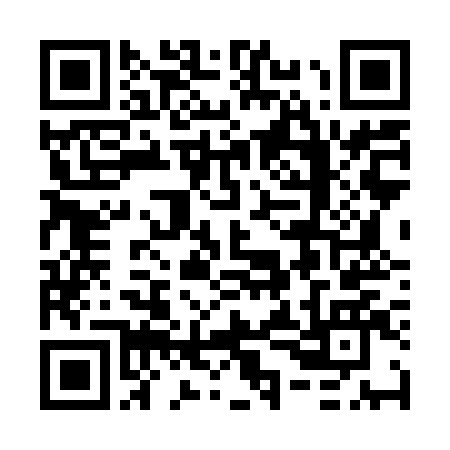

In [1]:
# Creating a QR code from any URL
import qrcode

url = 'https://www.transportation.ohio.gov/working/engineering/structural/bdm'

img = qrcode.make(url)
img

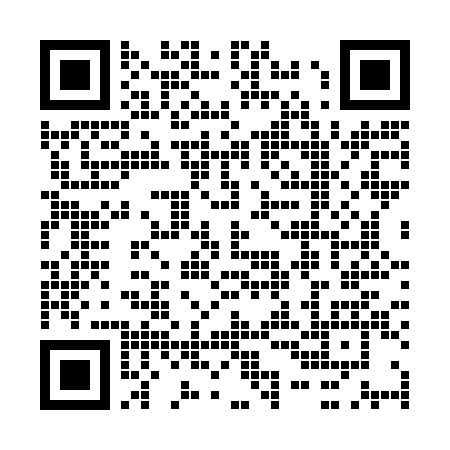

In [2]:
import qrcode
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers.pil import GappedSquareModuleDrawer
from qrcode.image.styles.colormasks import RadialGradiantColorMask

qr = qrcode.QRCode(error_correction=qrcode.constants.ERROR_CORRECT_M)
qr.add_data(url)

img = qr.make_image(back_color=(255,255,0), image_factory=StyledPilImage, module_drawer=GappedSquareModuleDrawer())

img

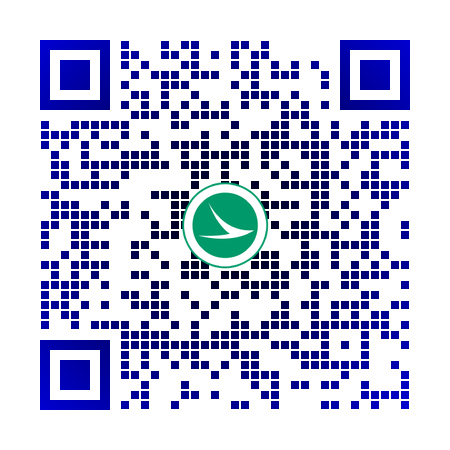

In [3]:
# Stylized QR Code:
img_3 = qr.make_image(back_color=(255,255,0), image_factory=StyledPilImage, color_mask=RadialGradiantColorMask(), module_drawer=GappedSquareModuleDrawer(), embeded_image_path="img\ODOT-The-Zephyr200.png")

img_3